## 12.1 Music Prediction with LSTM
TA: Bokyung Son (*Computational Linguistics Lab*)

This code is based on https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

<img src='img/butterfly.png', style='width: 80%'/>

- alpha: c(도), d(레), e(미), f(파), g(솔), a(라), b(시)
- numeric: 4(4분음표), 8(8분음표)

### 1. Predicting one step ahead
<img src='img/onestep.png', style='width: 80%'/>

### 2. Predicting whole song

Interim errors will be cumulated.
<img src='img/wholesong.png', style='width: 80%'/>

### You can check your output on scores with [Lilypond](http://lilypond.org/download.html)

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical

np.random.seed(5)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Create dataset

In [27]:
# Divide seq by [window_size(context) + 1(prediction target)]
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i : (i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [28]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_idx_value = 13

In [29]:
# whole song
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# context length = window_size
WINDOW_SIZE = 4
dataset = seq2dataset(seq, WINDOW_SIZE)

print(dataset.shape)
print(dataset)

num_samples = dataset.shape[0]

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [30]:
x_train = dataset[:, 0:WINDOW_SIZE]
y_train = dataset[:, WINDOW_SIZE]

# normalize
x_train = x_train / float(max_idx_value)

# vectorize labels
y_train = to_categorical(y_train)
one_hot_size = y_train.shape[1]
print('label vector size:', one_hot_size)  # number of codes that appear as labels

label vector size: 12


### MLP

Train

Epoch 1/2000
50/50 [==============================] - 0s 6ms/step - loss: 2.3677 - acc: 0.3400
Epoch 2/2000
50/50 [==============================] - 0s 337us/step - loss: 2.2051 - acc: 0.3400
Epoch 3/2000
50/50 [==============================] - 0s 328us/step - loss: 2.1063 - acc: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 304us/step - loss: 2.0248 - acc: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 395us/step - loss: 1.9758 - acc: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 389us/step - loss: 1.9424 - acc: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 584us/step - loss: 1.9198 - acc: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 599us/step - loss: 1.8972 - acc: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 485us/step - loss: 1.8766 - acc: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 701us/step - loss: 1.8613 - acc: 0.3400
Epoch 11/2000
50/50 [==========

50/50 [==============================] - 0s 437us/step - loss: 1.4548 - acc: 0.4600
Epoch 85/2000
50/50 [==============================] - 0s 357us/step - loss: 1.4609 - acc: 0.4800
Epoch 86/2000
50/50 [==============================] - 0s 349us/step - loss: 1.4619 - acc: 0.4200
Epoch 87/2000
50/50 [==============================] - 0s 348us/step - loss: 1.4603 - acc: 0.4200
Epoch 88/2000
50/50 [==============================] - 0s 323us/step - loss: 1.4394 - acc: 0.4800
Epoch 89/2000
50/50 [==============================] - 0s 330us/step - loss: 1.4453 - acc: 0.4600
Epoch 90/2000
50/50 [==============================] - 0s 334us/step - loss: 1.4345 - acc: 0.4200
Epoch 91/2000
50/50 [==============================] - 0s 335us/step - loss: 1.4349 - acc: 0.4400
Epoch 92/2000
50/50 [==============================] - 0s 312us/step - loss: 1.4342 - acc: 0.5200
Epoch 93/2000
50/50 [==============================] - 0s 336us/step - loss: 1.4271 - acc: 0.5400
Epoch 94/2000
50/50 [=============

50/50 [==============================] - 0s 412us/step - loss: 1.2933 - acc: 0.5200
Epoch 168/2000
50/50 [==============================] - 0s 354us/step - loss: 1.2918 - acc: 0.5600
Epoch 169/2000
50/50 [==============================] - 0s 490us/step - loss: 1.2875 - acc: 0.5400
Epoch 170/2000
50/50 [==============================] - 0s 431us/step - loss: 1.2828 - acc: 0.5400
Epoch 171/2000
50/50 [==============================] - 0s 378us/step - loss: 1.2782 - acc: 0.5400
Epoch 172/2000
50/50 [==============================] - 0s 345us/step - loss: 1.2719 - acc: 0.5600
Epoch 173/2000
50/50 [==============================] - 0s 446us/step - loss: 1.2706 - acc: 0.5400
Epoch 174/2000
50/50 [==============================] - 0s 332us/step - loss: 1.2752 - acc: 0.4800
Epoch 175/2000
50/50 [==============================] - 0s 345us/step - loss: 1.2706 - acc: 0.4800
Epoch 176/2000
50/50 [==============================] - 0s 410us/step - loss: 1.2716 - acc: 0.5000
Epoch 177/2000
50/50 [===

50/50 [==============================] - 0s 406us/step - loss: 1.1422 - acc: 0.6000
Epoch 250/2000
50/50 [==============================] - 0s 446us/step - loss: 1.1507 - acc: 0.5400
Epoch 251/2000
50/50 [==============================] - 0s 425us/step - loss: 1.1450 - acc: 0.5400
Epoch 252/2000
50/50 [==============================] - 0s 358us/step - loss: 1.1466 - acc: 0.5800
Epoch 253/2000
50/50 [==============================] - 0s 493us/step - loss: 1.1511 - acc: 0.5400
Epoch 254/2000
50/50 [==============================] - 0s 352us/step - loss: 1.1499 - acc: 0.5400
Epoch 255/2000
50/50 [==============================] - 0s 415us/step - loss: 1.1619 - acc: 0.5600
Epoch 256/2000
50/50 [==============================] - 0s 516us/step - loss: 1.1439 - acc: 0.5400
Epoch 257/2000
50/50 [==============================] - 0s 439us/step - loss: 1.1270 - acc: 0.5800
Epoch 258/2000
50/50 [==============================] - 0s 372us/step - loss: 1.1469 - acc: 0.6000
Epoch 259/2000
50/50 [===

50/50 [==============================] - 0s 366us/step - loss: 1.0256 - acc: 0.6200
Epoch 332/2000
50/50 [==============================] - 0s 379us/step - loss: 1.0258 - acc: 0.5800
Epoch 333/2000
50/50 [==============================] - 0s 402us/step - loss: 1.0369 - acc: 0.5200
Epoch 334/2000
50/50 [==============================] - 0s 346us/step - loss: 1.0444 - acc: 0.5400
Epoch 335/2000
50/50 [==============================] - 0s 336us/step - loss: 1.0481 - acc: 0.6000
Epoch 336/2000
50/50 [==============================] - 0s 335us/step - loss: 1.0316 - acc: 0.6000
Epoch 337/2000
50/50 [==============================] - 0s 407us/step - loss: 1.0333 - acc: 0.6000
Epoch 338/2000
50/50 [==============================] - 0s 325us/step - loss: 1.0209 - acc: 0.6200
Epoch 339/2000
50/50 [==============================] - 0s 369us/step - loss: 1.0296 - acc: 0.6000
Epoch 340/2000
50/50 [==============================] - 0s 356us/step - loss: 1.0147 - acc: 0.6000
Epoch 341/2000
50/50 [===

50/50 [==============================] - 0s 461us/step - loss: 0.9217 - acc: 0.6400
Epoch 414/2000
50/50 [==============================] - 0s 512us/step - loss: 0.9256 - acc: 0.6800
Epoch 415/2000
50/50 [==============================] - 0s 436us/step - loss: 0.9227 - acc: 0.6000
Epoch 416/2000
50/50 [==============================] - 0s 424us/step - loss: 0.9236 - acc: 0.6200
Epoch 417/2000
50/50 [==============================] - 0s 390us/step - loss: 0.9143 - acc: 0.6200
Epoch 418/2000
50/50 [==============================] - 0s 421us/step - loss: 0.9167 - acc: 0.6200
Epoch 419/2000
50/50 [==============================] - 0s 386us/step - loss: 0.9201 - acc: 0.6600
Epoch 420/2000
50/50 [==============================] - 0s 361us/step - loss: 0.9110 - acc: 0.6400
Epoch 421/2000
50/50 [==============================] - 0s 451us/step - loss: 0.9098 - acc: 0.6400
Epoch 422/2000
50/50 [==============================] - 0s 507us/step - loss: 0.9152 - acc: 0.6000
Epoch 423/2000
50/50 [===

50/50 [==============================] - 0s 417us/step - loss: 0.8309 - acc: 0.6400
Epoch 496/2000
50/50 [==============================] - 0s 367us/step - loss: 0.8200 - acc: 0.6400
Epoch 497/2000
50/50 [==============================] - 0s 378us/step - loss: 0.8286 - acc: 0.6600
Epoch 498/2000
50/50 [==============================] - 0s 450us/step - loss: 0.8277 - acc: 0.6600
Epoch 499/2000
50/50 [==============================] - 0s 335us/step - loss: 0.8502 - acc: 0.6200
Epoch 500/2000
50/50 [==============================] - 0s 334us/step - loss: 0.8176 - acc: 0.6600
Epoch 501/2000
50/50 [==============================] - 0s 340us/step - loss: 0.8153 - acc: 0.6800
Epoch 502/2000
50/50 [==============================] - 0s 429us/step - loss: 0.8247 - acc: 0.6800
Epoch 503/2000
50/50 [==============================] - 0s 359us/step - loss: 0.8200 - acc: 0.6600
Epoch 504/2000
50/50 [==============================] - 0s 409us/step - loss: 0.8156 - acc: 0.6600
Epoch 505/2000
50/50 [===

50/50 [==============================] - 0s 388us/step - loss: 0.7623 - acc: 0.7000
Epoch 578/2000
50/50 [==============================] - 0s 365us/step - loss: 0.7439 - acc: 0.7200
Epoch 579/2000
50/50 [==============================] - 0s 410us/step - loss: 0.7652 - acc: 0.7200
Epoch 580/2000
50/50 [==============================] - 0s 367us/step - loss: 0.7333 - acc: 0.7000
Epoch 581/2000
50/50 [==============================] - 0s 386us/step - loss: 0.7296 - acc: 0.7000
Epoch 582/2000
50/50 [==============================] - 0s 449us/step - loss: 0.7316 - acc: 0.7000
Epoch 583/2000
50/50 [==============================] - 0s 377us/step - loss: 0.7248 - acc: 0.7000
Epoch 584/2000
50/50 [==============================] - 0s 367us/step - loss: 0.7230 - acc: 0.7000
Epoch 585/2000
50/50 [==============================] - 0s 329us/step - loss: 0.7297 - acc: 0.6800
Epoch 586/2000
50/50 [==============================] - 0s 347us/step - loss: 0.7273 - acc: 0.7200
Epoch 587/2000
50/50 [===

50/50 [==============================] - 0s 495us/step - loss: 0.6417 - acc: 0.7800
Epoch 660/2000
50/50 [==============================] - 0s 480us/step - loss: 0.6390 - acc: 0.7400
Epoch 661/2000
50/50 [==============================] - 0s 474us/step - loss: 0.6504 - acc: 0.7200
Epoch 662/2000
50/50 [==============================] - 0s 469us/step - loss: 0.6411 - acc: 0.7200
Epoch 663/2000
50/50 [==============================] - 0s 473us/step - loss: 0.6442 - acc: 0.7200
Epoch 664/2000
50/50 [==============================] - 0s 500us/step - loss: 0.6401 - acc: 0.7800
Epoch 665/2000
50/50 [==============================] - 0s 430us/step - loss: 0.6368 - acc: 0.7600
Epoch 666/2000
50/50 [==============================] - 0s 466us/step - loss: 0.6432 - acc: 0.7000
Epoch 667/2000
50/50 [==============================] - 0s 578us/step - loss: 0.6460 - acc: 0.7200
Epoch 668/2000
50/50 [==============================] - 0s 423us/step - loss: 0.6695 - acc: 0.7400
Epoch 669/2000
50/50 [===

50/50 [==============================] - 0s 441us/step - loss: 0.5679 - acc: 0.7400
Epoch 742/2000
50/50 [==============================] - 0s 443us/step - loss: 0.5658 - acc: 0.8000
Epoch 743/2000
50/50 [==============================] - 0s 409us/step - loss: 0.5789 - acc: 0.8200
Epoch 744/2000
50/50 [==============================] - 0s 484us/step - loss: 0.5714 - acc: 0.8200
Epoch 745/2000
50/50 [==============================] - 0s 474us/step - loss: 0.5797 - acc: 0.7800
Epoch 746/2000
50/50 [==============================] - 0s 370us/step - loss: 0.5749 - acc: 0.8000
Epoch 747/2000
50/50 [==============================] - 0s 453us/step - loss: 0.5969 - acc: 0.8400
Epoch 748/2000
50/50 [==============================] - 0s 373us/step - loss: 0.5827 - acc: 0.8400
Epoch 749/2000
50/50 [==============================] - 0s 356us/step - loss: 0.5711 - acc: 0.7800
Epoch 750/2000
50/50 [==============================] - 0s 372us/step - loss: 0.5691 - acc: 0.8400
Epoch 751/2000
50/50 [===

50/50 [==============================] - 0s 473us/step - loss: 0.4989 - acc: 0.8000
Epoch 824/2000
50/50 [==============================] - 0s 520us/step - loss: 0.4997 - acc: 0.8600
Epoch 825/2000
50/50 [==============================] - 0s 472us/step - loss: 0.5054 - acc: 0.8200
Epoch 826/2000
50/50 [==============================] - 0s 418us/step - loss: 0.4994 - acc: 0.8200
Epoch 827/2000
50/50 [==============================] - 0s 378us/step - loss: 0.5112 - acc: 0.8000
Epoch 828/2000
50/50 [==============================] - 0s 395us/step - loss: 0.5055 - acc: 0.8600
Epoch 829/2000
50/50 [==============================] - 0s 500us/step - loss: 0.5203 - acc: 0.8600
Epoch 830/2000
50/50 [==============================] - 0s 421us/step - loss: 0.4909 - acc: 0.8200
Epoch 831/2000
50/50 [==============================] - 0s 554us/step - loss: 0.5039 - acc: 0.8400
Epoch 832/2000
50/50 [==============================] - 0s 452us/step - loss: 0.4911 - acc: 0.8600
Epoch 833/2000
50/50 [===

50/50 [==============================] - 0s 434us/step - loss: 0.4388 - acc: 0.8600
Epoch 906/2000
50/50 [==============================] - 0s 365us/step - loss: 0.4468 - acc: 0.8400
Epoch 907/2000
50/50 [==============================] - 0s 336us/step - loss: 0.4541 - acc: 0.8600
Epoch 908/2000
50/50 [==============================] - 0s 454us/step - loss: 0.4490 - acc: 0.8400
Epoch 909/2000
50/50 [==============================] - 0s 404us/step - loss: 0.4562 - acc: 0.8200
Epoch 910/2000
50/50 [==============================] - 0s 364us/step - loss: 0.4418 - acc: 0.8800
Epoch 911/2000
50/50 [==============================] - 0s 388us/step - loss: 0.4775 - acc: 0.8600
Epoch 912/2000
50/50 [==============================] - 0s 364us/step - loss: 0.4482 - acc: 0.8800
Epoch 913/2000
50/50 [==============================] - 0s 406us/step - loss: 0.4635 - acc: 0.8600
Epoch 914/2000
50/50 [==============================] - 0s 406us/step - loss: 0.4490 - acc: 0.8800
Epoch 915/2000
50/50 [===

50/50 [==============================] - 0s 414us/step - loss: 0.3961 - acc: 0.8800
Epoch 988/2000
50/50 [==============================] - 0s 412us/step - loss: 0.4077 - acc: 0.8600
Epoch 989/2000
50/50 [==============================] - 0s 503us/step - loss: 0.4065 - acc: 0.8400
Epoch 990/2000
50/50 [==============================] - 0s 349us/step - loss: 0.4187 - acc: 0.8400
Epoch 991/2000
50/50 [==============================] - 0s 307us/step - loss: 0.3969 - acc: 0.8800
Epoch 992/2000
50/50 [==============================] - 0s 370us/step - loss: 0.4195 - acc: 0.8800
Epoch 993/2000
50/50 [==============================] - 0s 351us/step - loss: 0.3913 - acc: 0.9200
Epoch 994/2000
50/50 [==============================] - 0s 370us/step - loss: 0.4051 - acc: 0.8600
Epoch 995/2000
50/50 [==============================] - 0s 329us/step - loss: 0.3939 - acc: 0.8800
Epoch 996/2000
50/50 [==============================] - 0s 342us/step - loss: 0.4277 - acc: 0.8800
Epoch 997/2000
50/50 [===

50/50 [==============================] - 0s 371us/step - loss: 0.3579 - acc: 0.8800
Epoch 1070/2000
50/50 [==============================] - 0s 438us/step - loss: 0.3517 - acc: 0.9200
Epoch 1071/2000
50/50 [==============================] - 0s 339us/step - loss: 0.3755 - acc: 0.8800
Epoch 1072/2000
50/50 [==============================] - 0s 342us/step - loss: 0.3599 - acc: 0.9200
Epoch 1073/2000
50/50 [==============================] - 0s 321us/step - loss: 0.3740 - acc: 0.8600
Epoch 1074/2000
50/50 [==============================] - 0s 364us/step - loss: 0.3539 - acc: 0.9000
Epoch 1075/2000
50/50 [==============================] - 0s 331us/step - loss: 0.3558 - acc: 0.9200
Epoch 1076/2000
50/50 [==============================] - 0s 322us/step - loss: 0.3572 - acc: 0.8800
Epoch 1077/2000
50/50 [==============================] - 0s 374us/step - loss: 0.3577 - acc: 0.9200
Epoch 1078/2000
50/50 [==============================] - 0s 383us/step - loss: 0.3469 - acc: 0.9000
Epoch 1079/2000


50/50 [==============================] - 0s 339us/step - loss: 0.3452 - acc: 0.9000
Epoch 1152/2000
50/50 [==============================] - 0s 355us/step - loss: 0.3356 - acc: 0.9000
Epoch 1153/2000
50/50 [==============================] - 0s 319us/step - loss: 0.3425 - acc: 0.8800
Epoch 1154/2000
50/50 [==============================] - 0s 367us/step - loss: 0.3212 - acc: 0.9000
Epoch 1155/2000
50/50 [==============================] - 0s 402us/step - loss: 0.3237 - acc: 0.9000
Epoch 1156/2000
50/50 [==============================] - 0s 353us/step - loss: 0.3371 - acc: 0.8800
Epoch 1157/2000
50/50 [==============================] - 0s 377us/step - loss: 0.3248 - acc: 0.9200
Epoch 1158/2000
50/50 [==============================] - 0s 347us/step - loss: 0.3164 - acc: 0.9200
Epoch 1159/2000
50/50 [==============================] - 0s 326us/step - loss: 0.3384 - acc: 0.9000
Epoch 1160/2000
50/50 [==============================] - 0s 375us/step - loss: 0.3407 - acc: 0.8600
Epoch 1161/2000


50/50 [==============================] - 0s 351us/step - loss: 0.3097 - acc: 0.9200
Epoch 1234/2000
50/50 [==============================] - 0s 346us/step - loss: 0.2933 - acc: 0.9200
Epoch 1235/2000
50/50 [==============================] - 0s 412us/step - loss: 0.3147 - acc: 0.8800
Epoch 1236/2000
50/50 [==============================] - 0s 400us/step - loss: 0.2969 - acc: 0.9000
Epoch 1237/2000
50/50 [==============================] - 0s 389us/step - loss: 0.2973 - acc: 0.8800
Epoch 1238/2000
50/50 [==============================] - 0s 470us/step - loss: 0.3488 - acc: 0.9000
Epoch 1239/2000
50/50 [==============================] - 0s 347us/step - loss: 0.3234 - acc: 0.9000
Epoch 1240/2000
50/50 [==============================] - 0s 373us/step - loss: 0.2996 - acc: 0.9000
Epoch 1241/2000
50/50 [==============================] - 0s 386us/step - loss: 0.3014 - acc: 0.8800
Epoch 1242/2000
50/50 [==============================] - 0s 324us/step - loss: 0.2885 - acc: 0.9200
Epoch 1243/2000


50/50 [==============================] - 0s 342us/step - loss: 0.2647 - acc: 0.9200
Epoch 1316/2000
50/50 [==============================] - 0s 318us/step - loss: 0.2763 - acc: 0.9200
Epoch 1317/2000
50/50 [==============================] - 0s 336us/step - loss: 0.2783 - acc: 0.9000
Epoch 1318/2000
50/50 [==============================] - 0s 334us/step - loss: 0.2718 - acc: 0.9200
Epoch 1319/2000
50/50 [==============================] - 0s 342us/step - loss: 0.2626 - acc: 0.9200
Epoch 1320/2000
50/50 [==============================] - 0s 328us/step - loss: 0.3015 - acc: 0.9000
Epoch 1321/2000
50/50 [==============================] - 0s 331us/step - loss: 0.2826 - acc: 0.9200
Epoch 1322/2000
50/50 [==============================] - 0s 337us/step - loss: 0.2821 - acc: 0.9400
Epoch 1323/2000
50/50 [==============================] - 0s 327us/step - loss: 0.2741 - acc: 0.9200
Epoch 1324/2000
50/50 [==============================] - 0s 297us/step - loss: 0.2869 - acc: 0.9200
Epoch 1325/2000


50/50 [==============================] - 0s 437us/step - loss: 0.2494 - acc: 0.9200
Epoch 1398/2000
50/50 [==============================] - 0s 509us/step - loss: 0.2418 - acc: 0.9200
Epoch 1399/2000
50/50 [==============================] - 0s 428us/step - loss: 0.2470 - acc: 0.9200
Epoch 1400/2000
50/50 [==============================] - 0s 451us/step - loss: 0.2524 - acc: 0.9200
Epoch 1401/2000
50/50 [==============================] - 0s 412us/step - loss: 0.2693 - acc: 0.9200
Epoch 1402/2000
50/50 [==============================] - 0s 400us/step - loss: 0.2637 - acc: 0.9000
Epoch 1403/2000
50/50 [==============================] - 0s 466us/step - loss: 0.2595 - acc: 0.9200
Epoch 1404/2000
50/50 [==============================] - 0s 402us/step - loss: 0.2484 - acc: 0.9200
Epoch 1405/2000
50/50 [==============================] - 0s 439us/step - loss: 0.2568 - acc: 0.9000
Epoch 1406/2000
50/50 [==============================] - 0s 474us/step - loss: 0.2526 - acc: 0.9200
Epoch 1407/2000


50/50 [==============================] - 0s 380us/step - loss: 0.2322 - acc: 0.9400
Epoch 1480/2000
50/50 [==============================] - 0s 399us/step - loss: 0.2543 - acc: 0.9200
Epoch 1481/2000
50/50 [==============================] - 0s 446us/step - loss: 0.2936 - acc: 0.9000
Epoch 1482/2000
50/50 [==============================] - 0s 390us/step - loss: 0.3356 - acc: 0.8600
Epoch 1483/2000
50/50 [==============================] - 0s 414us/step - loss: 0.3162 - acc: 0.8400
Epoch 1484/2000
50/50 [==============================] - 0s 432us/step - loss: 0.2637 - acc: 0.9400
Epoch 1485/2000
50/50 [==============================] - 0s 460us/step - loss: 0.2336 - acc: 0.9200
Epoch 1486/2000
50/50 [==============================] - 0s 397us/step - loss: 0.3022 - acc: 0.9200
Epoch 1487/2000
50/50 [==============================] - 0s 450us/step - loss: 0.2328 - acc: 0.9400
Epoch 1488/2000
50/50 [==============================] - 0s 361us/step - loss: 0.2466 - acc: 0.9200
Epoch 1489/2000


50/50 [==============================] - 0s 365us/step - loss: 0.2256 - acc: 0.9000
Epoch 1562/2000
50/50 [==============================] - 0s 343us/step - loss: 0.2290 - acc: 0.9200
Epoch 1563/2000
50/50 [==============================] - 0s 372us/step - loss: 0.2442 - acc: 0.9000
Epoch 1564/2000
50/50 [==============================] - 0s 422us/step - loss: 0.2216 - acc: 0.8800
Epoch 1565/2000
50/50 [==============================] - 0s 365us/step - loss: 0.2103 - acc: 0.9200
Epoch 1566/2000
50/50 [==============================] - 0s 362us/step - loss: 0.2244 - acc: 0.9200
Epoch 1567/2000
50/50 [==============================] - 0s 319us/step - loss: 0.2163 - acc: 0.9200
Epoch 1568/2000
50/50 [==============================] - 0s 369us/step - loss: 0.2167 - acc: 0.9200
Epoch 1569/2000
50/50 [==============================] - 0s 322us/step - loss: 0.2153 - acc: 0.9000
Epoch 1570/2000
50/50 [==============================] - 0s 348us/step - loss: 0.2290 - acc: 0.8800
Epoch 1571/2000


50/50 [==============================] - 0s 378us/step - loss: 0.2121 - acc: 0.9000
Epoch 1644/2000
50/50 [==============================] - 0s 389us/step - loss: 0.2114 - acc: 0.9200
Epoch 1645/2000
50/50 [==============================] - 0s 424us/step - loss: 0.2062 - acc: 0.9200
Epoch 1646/2000
50/50 [==============================] - 0s 403us/step - loss: 0.2072 - acc: 0.9200
Epoch 1647/2000
50/50 [==============================] - 0s 337us/step - loss: 0.1982 - acc: 0.9000
Epoch 1648/2000
50/50 [==============================] - 0s 356us/step - loss: 0.2145 - acc: 0.9000
Epoch 1649/2000
50/50 [==============================] - 0s 357us/step - loss: 0.2362 - acc: 0.8800
Epoch 1650/2000
50/50 [==============================] - 0s 372us/step - loss: 0.2111 - acc: 0.9200
Epoch 1651/2000
50/50 [==============================] - 0s 373us/step - loss: 0.2085 - acc: 0.9200
Epoch 1652/2000
50/50 [==============================] - 0s 384us/step - loss: 0.2106 - acc: 0.9200
Epoch 1653/2000


50/50 [==============================] - 0s 380us/step - loss: 0.2047 - acc: 0.9200
Epoch 1726/2000
50/50 [==============================] - 0s 331us/step - loss: 0.1943 - acc: 0.9200
Epoch 1727/2000
50/50 [==============================] - 0s 336us/step - loss: 0.1982 - acc: 0.9200
Epoch 1728/2000
50/50 [==============================] - 0s 375us/step - loss: 0.1897 - acc: 0.9200
Epoch 1729/2000
50/50 [==============================] - 0s 385us/step - loss: 0.2181 - acc: 0.9000
Epoch 1730/2000
50/50 [==============================] - 0s 380us/step - loss: 0.2168 - acc: 0.8800
Epoch 1731/2000
50/50 [==============================] - 0s 353us/step - loss: 0.2013 - acc: 0.9000
Epoch 1732/2000
50/50 [==============================] - 0s 369us/step - loss: 0.2057 - acc: 0.9000
Epoch 1733/2000
50/50 [==============================] - 0s 276us/step - loss: 0.1991 - acc: 0.9200
Epoch 1734/2000
50/50 [==============================] - 0s 325us/step - loss: 0.1990 - acc: 0.9000
Epoch 1735/2000


50/50 [==============================] - 0s 311us/step - loss: 0.1887 - acc: 0.9200
Epoch 1808/2000
50/50 [==============================] - 0s 360us/step - loss: 0.1897 - acc: 0.9200
Epoch 1809/2000
50/50 [==============================] - 0s 354us/step - loss: 0.1964 - acc: 0.9200
Epoch 1810/2000
50/50 [==============================] - 0s 360us/step - loss: 0.1983 - acc: 0.9400
Epoch 1811/2000
50/50 [==============================] - 0s 344us/step - loss: 0.2173 - acc: 0.9200
Epoch 1812/2000
50/50 [==============================] - 0s 349us/step - loss: 0.1795 - acc: 0.9200
Epoch 1813/2000
50/50 [==============================] - 0s 349us/step - loss: 0.2089 - acc: 0.9000
Epoch 1814/2000
50/50 [==============================] - 0s 328us/step - loss: 0.1806 - acc: 0.9200
Epoch 1815/2000
50/50 [==============================] - 0s 409us/step - loss: 0.2027 - acc: 0.9200
Epoch 1816/2000
50/50 [==============================] - 0s 369us/step - loss: 0.2010 - acc: 0.9000
Epoch 1817/2000


50/50 [==============================] - 0s 365us/step - loss: 0.1835 - acc: 0.9200
Epoch 1890/2000
50/50 [==============================] - 0s 370us/step - loss: 0.2179 - acc: 0.9200
Epoch 1891/2000
50/50 [==============================] - 0s 339us/step - loss: 0.2045 - acc: 0.9000
Epoch 1892/2000
50/50 [==============================] - 0s 358us/step - loss: 0.1898 - acc: 0.9200
Epoch 1893/2000
50/50 [==============================] - 0s 345us/step - loss: 0.1774 - acc: 0.9200
Epoch 1894/2000
50/50 [==============================] - 0s 339us/step - loss: 0.1806 - acc: 0.9200
Epoch 1895/2000
50/50 [==============================] - 0s 372us/step - loss: 0.1872 - acc: 0.9200
Epoch 1896/2000
50/50 [==============================] - 0s 364us/step - loss: 0.1915 - acc: 0.9000
Epoch 1897/2000
50/50 [==============================] - 0s 462us/step - loss: 0.1740 - acc: 0.9400
Epoch 1898/2000
50/50 [==============================] - 0s 342us/step - loss: 0.2096 - acc: 0.9200
Epoch 1899/2000


50/50 [==============================] - 0s 322us/step - loss: 0.1727 - acc: 0.9200
Epoch 1972/2000
50/50 [==============================] - 0s 336us/step - loss: 0.1668 - acc: 0.9000
Epoch 1973/2000
50/50 [==============================] - 0s 353us/step - loss: 0.1686 - acc: 0.9000
Epoch 1974/2000
50/50 [==============================] - 0s 315us/step - loss: 0.1693 - acc: 0.9000
Epoch 1975/2000
50/50 [==============================] - 0s 334us/step - loss: 0.1818 - acc: 0.9200
Epoch 1976/2000
50/50 [==============================] - 0s 332us/step - loss: 0.1704 - acc: 0.9200
Epoch 1977/2000
50/50 [==============================] - 0s 346us/step - loss: 0.1650 - acc: 0.9200
Epoch 1978/2000
50/50 [==============================] - 0s 341us/step - loss: 0.1697 - acc: 0.9000
Epoch 1979/2000
50/50 [==============================] - 0s 332us/step - loss: 0.1696 - acc: 0.8800
Epoch 1980/2000
50/50 [==============================] - 0s 358us/step - loss: 0.1647 - acc: 0.9200
Epoch 1981/2000


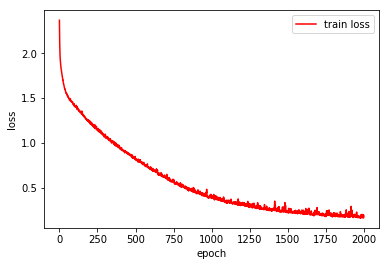

50/50 [==============================] - 0s 624us/step
acc: 92.00


In [7]:
# Build
model = Sequential()
model.add(Dense(128, input_dim=WINDOW_SIZE, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_size, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train,
                    epochs=2000,
                    batch_size=8,
                    verbose=1)
    
# Plot training
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate
scores = model.evaluate(x_train, y_train)
print('{0}: {1:.2f}'.format(model.metrics_names[1], scores[1]*100))

Predict

In [8]:
pred_count = num_samples  # max number of predictions

# 1. one step ahead
seq_out = ['g8', 'e8', 'e4', 'f8']  # final code (append predictions here)
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])  # transform: softmax of length `one_hot_size` -> index
    seq_out.append(idx2code[idx])  # transform: index -> code

print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


<img src='img/mlp_one.png', style='width: 80%'/>

In [9]:
# 2. whole song
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in  # final code (append predictions here)
seq_in = [code2idx[code] / float(max_idx_value) for code in seq_in] # transform: code -> normalized index

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = sample_in.reshape((1, WINDOW_SIZE)) # (batch_size, feature)
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)  # transform: softmax of size `num_labels` -> index
    seq_out.append(idx2code[idx])  # transform: index -> code
    seq_in.append(idx / float(max_idx_value))  # append normalized code to context (input) vector
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


<img src='img/mlp_full.png', style='width: 80%'/>

### Stateless LSTM

Train

Epoch 1/2000
50/50 [==============================] - 1s 13ms/step - loss: 2.4801 - acc: 0.1200
Epoch 2/2000
50/50 [==============================] - 0s 898us/step - loss: 2.4118 - acc: 0.3400
Epoch 3/2000
50/50 [==============================] - 0s 1ms/step - loss: 2.3536 - acc: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 981us/step - loss: 2.2815 - acc: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 960us/step - loss: 2.1872 - acc: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 996us/step - loss: 2.0693 - acc: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 926us/step - loss: 2.0075 - acc: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 968us/step - loss: 1.9889 - acc: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 948us/step - loss: 1.9665 - acc: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 979us/step - loss: 1.9458 - acc: 0.3400
Epoch 11/2000
50/50 [===========

50/50 [==============================] - 0s 961us/step - loss: 1.8036 - acc: 0.3200
Epoch 86/2000
50/50 [==============================] - 0s 925us/step - loss: 1.7908 - acc: 0.3400
Epoch 87/2000
50/50 [==============================] - 0s 981us/step - loss: 1.7964 - acc: 0.3800
Epoch 88/2000
50/50 [==============================] - 0s 978us/step - loss: 1.7919 - acc: 0.3400
Epoch 89/2000
50/50 [==============================] - 0s 969us/step - loss: 1.7688 - acc: 0.3600
Epoch 90/2000
50/50 [==============================] - 0s 986us/step - loss: 1.7786 - acc: 0.3400
Epoch 91/2000
50/50 [==============================] - 0s 971us/step - loss: 1.7578 - acc: 0.3800
Epoch 92/2000
50/50 [==============================] - 0s 975us/step - loss: 1.7814 - acc: 0.3400
Epoch 93/2000
50/50 [==============================] - 0s 948us/step - loss: 1.7459 - acc: 0.3600
Epoch 94/2000
50/50 [==============================] - 0s 978us/step - loss: 1.7567 - acc: 0.3600
Epoch 95/2000
50/50 [=============

50/50 [==============================] - 0s 978us/step - loss: 1.5076 - acc: 0.4000
Epoch 169/2000
50/50 [==============================] - 0s 972us/step - loss: 1.4971 - acc: 0.4600
Epoch 170/2000
50/50 [==============================] - 0s 1ms/step - loss: 1.4750 - acc: 0.4400
Epoch 171/2000
50/50 [==============================] - 0s 1ms/step - loss: 1.4859 - acc: 0.4400
Epoch 172/2000
50/50 [==============================] - 0s 991us/step - loss: 1.4802 - acc: 0.4600
Epoch 173/2000
50/50 [==============================] - 0s 1ms/step - loss: 1.4756 - acc: 0.4800
Epoch 174/2000
50/50 [==============================] - 0s 982us/step - loss: 1.4852 - acc: 0.4800
Epoch 175/2000
50/50 [==============================] - 0s 933us/step - loss: 1.4607 - acc: 0.4800
Epoch 176/2000
50/50 [==============================] - 0s 965us/step - loss: 1.4805 - acc: 0.4000
Epoch 177/2000
50/50 [==============================] - 0s 966us/step - loss: 1.4645 - acc: 0.4600
Epoch 178/2000
50/50 [=========

50/50 [==============================] - 0s 1ms/step - loss: 1.2831 - acc: 0.5400
Epoch 252/2000
50/50 [==============================] - 0s 977us/step - loss: 1.2808 - acc: 0.5400
Epoch 253/2000
50/50 [==============================] - 0s 874us/step - loss: 1.3070 - acc: 0.5400
Epoch 254/2000
50/50 [==============================] - 0s 982us/step - loss: 1.2784 - acc: 0.5200
Epoch 255/2000
50/50 [==============================] - 0s 981us/step - loss: 1.2623 - acc: 0.5200
Epoch 256/2000
50/50 [==============================] - 0s 994us/step - loss: 1.2519 - acc: 0.5600
Epoch 257/2000
50/50 [==============================] - 0s 973us/step - loss: 1.2702 - acc: 0.5000
Epoch 258/2000
50/50 [==============================] - 0s 964us/step - loss: 1.2566 - acc: 0.5200
Epoch 259/2000
50/50 [==============================] - 0s 995us/step - loss: 1.2591 - acc: 0.5000
Epoch 260/2000
50/50 [==============================] - 0s 980us/step - loss: 1.2590 - acc: 0.5400
Epoch 261/2000
50/50 [=====

50/50 [==============================] - 0s 939us/step - loss: 1.0829 - acc: 0.5800
Epoch 335/2000
50/50 [==============================] - 0s 912us/step - loss: 1.1202 - acc: 0.5400
Epoch 336/2000
50/50 [==============================] - 0s 998us/step - loss: 1.0766 - acc: 0.5800
Epoch 337/2000
50/50 [==============================] - 0s 1ms/step - loss: 1.0744 - acc: 0.5800
Epoch 338/2000
50/50 [==============================] - 0s 1ms/step - loss: 1.0608 - acc: 0.5800
Epoch 339/2000
50/50 [==============================] - 0s 972us/step - loss: 1.0519 - acc: 0.5600
Epoch 340/2000
50/50 [==============================] - 0s 924us/step - loss: 1.0254 - acc: 0.6000
Epoch 341/2000
50/50 [==============================] - 0s 968us/step - loss: 1.0464 - acc: 0.6200
Epoch 342/2000
50/50 [==============================] - 0s 962us/step - loss: 1.0556 - acc: 0.6200
Epoch 343/2000
50/50 [==============================] - 0s 974us/step - loss: 1.0243 - acc: 0.6200
Epoch 344/2000
50/50 [=======

50/50 [==============================] - 0s 1ms/step - loss: 0.8514 - acc: 0.6200
Epoch 418/2000
50/50 [==============================] - 0s 970us/step - loss: 0.8845 - acc: 0.6400
Epoch 419/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.8533 - acc: 0.6600
Epoch 420/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.8437 - acc: 0.7000
Epoch 421/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.8168 - acc: 0.7000
Epoch 422/2000
50/50 [==============================] - 0s 987us/step - loss: 0.8145 - acc: 0.6200
Epoch 423/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.8421 - acc: 0.6000
Epoch 424/2000
50/50 [==============================] - 0s 987us/step - loss: 0.7934 - acc: 0.6400
Epoch 425/2000
50/50 [==============================] - 0s 938us/step - loss: 0.8046 - acc: 0.7000
Epoch 426/2000
50/50 [==============================] - 0s 985us/step - loss: 0.8229 - acc: 0.6400
Epoch 427/2000
50/50 [=============

50/50 [==============================] - 0s 1ms/step - loss: 0.6482 - acc: 0.7800
Epoch 501/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.6499 - acc: 0.8000
Epoch 502/2000
50/50 [==============================] - 0s 940us/step - loss: 0.6647 - acc: 0.7400
Epoch 503/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.6935 - acc: 0.7400
Epoch 504/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.8498 - acc: 0.6600
Epoch 505/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.6639 - acc: 0.7000
Epoch 506/2000
50/50 [==============================] - 0s 936us/step - loss: 0.7337 - acc: 0.6600
Epoch 507/2000
50/50 [==============================] - 0s 958us/step - loss: 0.8632 - acc: 0.6800
Epoch 508/2000
50/50 [==============================] - 0s 981us/step - loss: 0.7099 - acc: 0.7200
Epoch 509/2000
50/50 [==============================] - 0s 998us/step - loss: 0.6682 - acc: 0.8000
Epoch 510/2000
50/50 [=============

50/50 [==============================] - 0s 1ms/step - loss: 0.5527 - acc: 0.7800
Epoch 584/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5511 - acc: 0.8000
Epoch 585/2000
50/50 [==============================] - 0s 971us/step - loss: 0.5612 - acc: 0.7800
Epoch 586/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5396 - acc: 0.8400
Epoch 587/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5920 - acc: 0.7600
Epoch 588/2000
50/50 [==============================] - 0s 991us/step - loss: 0.5715 - acc: 0.7800
Epoch 589/2000
50/50 [==============================] - 0s 976us/step - loss: 0.6000 - acc: 0.7600
Epoch 590/2000
50/50 [==============================] - 0s 979us/step - loss: 0.5745 - acc: 0.7200
Epoch 591/2000
50/50 [==============================] - 0s 891us/step - loss: 0.6038 - acc: 0.7000
Epoch 592/2000
50/50 [==============================] - 0s 970us/step - loss: 0.5602 - acc: 0.7800
Epoch 593/2000
50/50 [===========

50/50 [==============================] - 0s 961us/step - loss: 0.4828 - acc: 0.8400
Epoch 667/2000
50/50 [==============================] - 0s 966us/step - loss: 0.4806 - acc: 0.8000
Epoch 668/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5144 - acc: 0.8000
Epoch 669/2000
50/50 [==============================] - 0s 997us/step - loss: 0.4937 - acc: 0.8200
Epoch 670/2000
50/50 [==============================] - 0s 986us/step - loss: 0.4921 - acc: 0.8200
Epoch 671/2000
50/50 [==============================] - 0s 982us/step - loss: 0.4942 - acc: 0.8400
Epoch 672/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4814 - acc: 0.8200
Epoch 673/2000
50/50 [==============================] - 0s 900us/step - loss: 0.4778 - acc: 0.8200
Epoch 674/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4701 - acc: 0.8200
Epoch 675/2000
50/50 [==============================] - 0s 903us/step - loss: 0.4774 - acc: 0.8200
Epoch 676/2000
50/50 [=========

50/50 [==============================] - 0s 913us/step - loss: 0.4406 - acc: 0.8400
Epoch 750/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4429 - acc: 0.8200
Epoch 751/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4682 - acc: 0.8600
Epoch 752/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4481 - acc: 0.8200
Epoch 753/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4406 - acc: 0.8200
Epoch 754/2000
50/50 [==============================] - 0s 984us/step - loss: 0.4542 - acc: 0.8600
Epoch 755/2000
50/50 [==============================] - 0s 980us/step - loss: 0.5501 - acc: 0.8200
Epoch 756/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4462 - acc: 0.8400
Epoch 757/2000
50/50 [==============================] - 0s 1000us/step - loss: 0.5639 - acc: 0.7600
Epoch 758/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4931 - acc: 0.7800
Epoch 759/2000
50/50 [==============

50/50 [==============================] - 0s 1ms/step - loss: 0.4229 - acc: 0.8600
Epoch 833/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4139 - acc: 0.8600
Epoch 834/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4148 - acc: 0.8400
Epoch 835/2000
50/50 [==============================] - 0s 989us/step - loss: 0.4123 - acc: 0.8200
Epoch 836/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4136 - acc: 0.8200
Epoch 837/2000
50/50 [==============================] - 0s 990us/step - loss: 0.4138 - acc: 0.8400
Epoch 838/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4815 - acc: 0.8200
Epoch 839/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5124 - acc: 0.8000
Epoch 840/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.5737 - acc: 0.8000
Epoch 841/2000
50/50 [==============================] - 0s 970us/step - loss: 0.6689 - acc: 0.7600
Epoch 842/2000
50/50 [=================

50/50 [==============================] - 0s 952us/step - loss: 0.3971 - acc: 0.8600
Epoch 916/2000
50/50 [==============================] - 0s 911us/step - loss: 0.4500 - acc: 0.8000
Epoch 917/2000
50/50 [==============================] - 0s 958us/step - loss: 0.4350 - acc: 0.8400
Epoch 918/2000
50/50 [==============================] - 0s 958us/step - loss: 0.4781 - acc: 0.7800
Epoch 919/2000
50/50 [==============================] - 0s 984us/step - loss: 0.4163 - acc: 0.8400
Epoch 920/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3854 - acc: 0.8400
Epoch 921/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3858 - acc: 0.8200
Epoch 922/2000
50/50 [==============================] - 0s 916us/step - loss: 0.3959 - acc: 0.8000
Epoch 923/2000
50/50 [==============================] - 0s 950us/step - loss: 0.3928 - acc: 0.8400
Epoch 924/2000
50/50 [==============================] - 0s 999us/step - loss: 0.4023 - acc: 0.8200
Epoch 925/2000
50/50 [=======

50/50 [==============================] - 0s 989us/step - loss: 0.4004 - acc: 0.8200
Epoch 999/2000
50/50 [==============================] - 0s 968us/step - loss: 0.3695 - acc: 0.8400
Epoch 1000/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3928 - acc: 0.8200
Epoch 1001/2000
50/50 [==============================] - 0s 979us/step - loss: 0.3687 - acc: 0.8600
Epoch 1002/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3767 - acc: 0.8200
Epoch 1003/2000
50/50 [==============================] - 0s 982us/step - loss: 0.4336 - acc: 0.8200
Epoch 1004/2000
50/50 [==============================] - 0s 994us/step - loss: 0.4215 - acc: 0.8600
Epoch 1005/2000
50/50 [==============================] - 0s 984us/step - loss: 0.3812 - acc: 0.8400
Epoch 1006/2000
50/50 [==============================] - 0s 979us/step - loss: 0.3872 - acc: 0.8400
Epoch 1007/2000
50/50 [==============================] - 0s 988us/step - loss: 0.3865 - acc: 0.8400
Epoch 1008/2000
50/50

50/50 [==============================] - 0s 987us/step - loss: 0.3620 - acc: 0.8200
Epoch 1081/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3635 - acc: 0.8400
Epoch 1082/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3824 - acc: 0.8400
Epoch 1083/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3704 - acc: 0.8200
Epoch 1084/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3879 - acc: 0.8200
Epoch 1085/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3645 - acc: 0.8600
Epoch 1086/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3698 - acc: 0.8400
Epoch 1087/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3887 - acc: 0.8000
Epoch 1088/2000
50/50 [==============================] - 0s 965us/step - loss: 0.4355 - acc: 0.8200
Epoch 1089/2000
50/50 [==============================] - 0s 966us/step - loss: 0.3784 - acc: 0.8600
Epoch 1090/2000
50/50 [=======

50/50 [==============================] - 0s 1ms/step - loss: 0.3433 - acc: 0.8400
Epoch 1163/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4017 - acc: 0.8600
Epoch 1164/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3471 - acc: 0.8800
Epoch 1165/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3646 - acc: 0.8600
Epoch 1166/2000
50/50 [==============================] - 0s 950us/step - loss: 0.3241 - acc: 0.8800
Epoch 1167/2000
50/50 [==============================] - 0s 911us/step - loss: 0.3299 - acc: 0.8800
Epoch 1168/2000
50/50 [==============================] - 0s 986us/step - loss: 0.3511 - acc: 0.8600
Epoch 1169/2000
50/50 [==============================] - 0s 946us/step - loss: 0.3269 - acc: 0.8600
Epoch 1170/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3367 - acc: 0.8800
Epoch 1171/2000
50/50 [==============================] - 0s 995us/step - loss: 0.3366 - acc: 0.8400
Epoch 1172/2000
50/50 [===

50/50 [==============================] - 0s 936us/step - loss: 0.4503 - acc: 0.8200
Epoch 1245/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.4607 - acc: 0.8200
Epoch 1246/2000
50/50 [==============================] - 0s 978us/step - loss: 0.4210 - acc: 0.8000
Epoch 1247/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3550 - acc: 0.8800
Epoch 1248/2000
50/50 [==============================] - 0s 944us/step - loss: 0.3777 - acc: 0.8400
Epoch 1249/2000
50/50 [==============================] - 0s 995us/step - loss: 0.3299 - acc: 0.8800
Epoch 1250/2000
50/50 [==============================] - 0s 964us/step - loss: 0.3476 - acc: 0.8800
Epoch 1251/2000
50/50 [==============================] - 0s 982us/step - loss: 0.3418 - acc: 0.8800
Epoch 1252/2000
50/50 [==============================] - 0s 981us/step - loss: 0.3333 - acc: 0.8800
Epoch 1253/2000
50/50 [==============================] - 0s 982us/step - loss: 0.3570 - acc: 0.8600
Epoch 1254/2000
50/5

50/50 [==============================] - 0s 935us/step - loss: 0.3113 - acc: 0.8800
Epoch 1327/2000
50/50 [==============================] - 0s 913us/step - loss: 0.3318 - acc: 0.8600
Epoch 1328/2000
50/50 [==============================] - 0s 939us/step - loss: 0.2997 - acc: 0.8600
Epoch 1329/2000
50/50 [==============================] - 0s 919us/step - loss: 0.3062 - acc: 0.9000
Epoch 1330/2000
50/50 [==============================] - 0s 959us/step - loss: 0.3334 - acc: 0.8800
Epoch 1331/2000
50/50 [==============================] - 0s 986us/step - loss: 0.3203 - acc: 0.8800
Epoch 1332/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3109 - acc: 0.8600
Epoch 1333/2000
50/50 [==============================] - 0s 980us/step - loss: 0.4221 - acc: 0.8400
Epoch 1334/2000
50/50 [==============================] - 0s 977us/step - loss: 0.3849 - acc: 0.8000
Epoch 1335/2000
50/50 [==============================] - 0s 933us/step - loss: 0.3382 - acc: 0.8400
Epoch 1336/2000
50

50/50 [==============================] - 0s 985us/step - loss: 0.3037 - acc: 0.8800
Epoch 1409/2000
50/50 [==============================] - 0s 963us/step - loss: 0.3047 - acc: 0.8800
Epoch 1410/2000
50/50 [==============================] - 0s 977us/step - loss: 0.2979 - acc: 0.8800
Epoch 1411/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3049 - acc: 0.8600
Epoch 1412/2000
50/50 [==============================] - 0s 970us/step - loss: 0.3000 - acc: 0.8600
Epoch 1413/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2985 - acc: 0.8800
Epoch 1414/2000
50/50 [==============================] - 0s 993us/step - loss: 0.3017 - acc: 0.9000
Epoch 1415/2000
50/50 [==============================] - 0s 981us/step - loss: 0.3041 - acc: 0.8800
Epoch 1416/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2982 - acc: 0.8600
Epoch 1417/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3190 - acc: 0.8400
Epoch 1418/2000
50/50 [=

50/50 [==============================] - 0s 941us/step - loss: 0.3167 - acc: 0.8600
Epoch 1491/2000
50/50 [==============================] - 0s 940us/step - loss: 0.3101 - acc: 0.8600
Epoch 1492/2000
50/50 [==============================] - 0s 989us/step - loss: 0.2977 - acc: 0.8600
Epoch 1493/2000
50/50 [==============================] - 0s 999us/step - loss: 0.3083 - acc: 0.8600
Epoch 1494/2000
50/50 [==============================] - 0s 991us/step - loss: 0.3189 - acc: 0.8600
Epoch 1495/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3064 - acc: 0.8600
Epoch 1496/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3146 - acc: 0.8600
Epoch 1497/2000
50/50 [==============================] - 0s 984us/step - loss: 0.2969 - acc: 0.8600
Epoch 1498/2000
50/50 [==============================] - 0s 980us/step - loss: 0.3035 - acc: 0.8600
Epoch 1499/2000
50/50 [==============================] - 0s 989us/step - loss: 0.3010 - acc: 0.9000
Epoch 1500/2000
50/5

50/50 [==============================] - 0s 1ms/step - loss: 0.2889 - acc: 0.8800
Epoch 1573/2000
50/50 [==============================] - 0s 866us/step - loss: 0.2927 - acc: 0.8800
Epoch 1574/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2838 - acc: 0.8800
Epoch 1575/2000
50/50 [==============================] - 0s 979us/step - loss: 0.3057 - acc: 0.8400
Epoch 1576/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3039 - acc: 0.8400
Epoch 1577/2000
50/50 [==============================] - 0s 981us/step - loss: 0.2925 - acc: 0.8600
Epoch 1578/2000
50/50 [==============================] - 0s 912us/step - loss: 0.2930 - acc: 0.8800
Epoch 1579/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2748 - acc: 0.9000
Epoch 1580/2000
50/50 [==============================] - 0s 996us/step - loss: 0.2993 - acc: 0.8200
Epoch 1581/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3024 - acc: 0.8200
Epoch 1582/2000
50/50 [===

50/50 [==============================] - 0s 1ms/step - loss: 0.2842 - acc: 0.8800
Epoch 1655/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2836 - acc: 0.8800
Epoch 1656/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2792 - acc: 0.8800
Epoch 1657/2000
50/50 [==============================] - 0s 944us/step - loss: 0.2839 - acc: 0.8800
Epoch 1658/2000
50/50 [==============================] - 0s 994us/step - loss: 0.2847 - acc: 0.8600
Epoch 1659/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2844 - acc: 0.8600
Epoch 1660/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2881 - acc: 0.8400
Epoch 1661/2000
50/50 [==============================] - 0s 949us/step - loss: 0.2818 - acc: 0.8800
Epoch 1662/2000
50/50 [==============================] - 0s 982us/step - loss: 0.2787 - acc: 0.8800
Epoch 1663/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2838 - acc: 0.8800
Epoch 1664/2000
50/50 [=====

Epoch 1737/2000
50/50 [==============================] - 0s 984us/step - loss: 0.2835 - acc: 0.8600
Epoch 1738/2000
50/50 [==============================] - 0s 952us/step - loss: 0.2875 - acc: 0.8400
Epoch 1739/2000
50/50 [==============================] - 0s 976us/step - loss: 0.2888 - acc: 0.8600
Epoch 1740/2000
50/50 [==============================] - 0s 980us/step - loss: 0.2938 - acc: 0.8600
Epoch 1741/2000
50/50 [==============================] - 0s 964us/step - loss: 0.3260 - acc: 0.8400
Epoch 1742/2000
50/50 [==============================] - 0s 965us/step - loss: 0.3179 - acc: 0.8600
Epoch 1743/2000
50/50 [==============================] - 0s 994us/step - loss: 0.2951 - acc: 0.8800
Epoch 1744/2000
50/50 [==============================] - 0s 992us/step - loss: 0.3077 - acc: 0.8800
Epoch 1745/2000
50/50 [==============================] - 0s 956us/step - loss: 0.2790 - acc: 0.8600
Epoch 1746/2000
50/50 [==============================] - 0s 984us/step - loss: 0.3047 - acc: 0.8400


50/50 [==============================] - 0s 983us/step - loss: 0.2681 - acc: 0.8800
Epoch 1820/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2777 - acc: 0.8600
Epoch 1821/2000
50/50 [==============================] - 0s 994us/step - loss: 0.3150 - acc: 0.8600
Epoch 1822/2000
50/50 [==============================] - 0s 890us/step - loss: 0.2698 - acc: 0.8800
Epoch 1823/2000
50/50 [==============================] - 0s 986us/step - loss: 0.2703 - acc: 0.8800
Epoch 1824/2000
50/50 [==============================] - 0s 906us/step - loss: 0.2934 - acc: 0.8800
Epoch 1825/2000
50/50 [==============================] - 0s 954us/step - loss: 0.2801 - acc: 0.8800
Epoch 1826/2000
50/50 [==============================] - 0s 944us/step - loss: 0.2872 - acc: 0.8600
Epoch 1827/2000
50/50 [==============================] - 0s 965us/step - loss: 0.2762 - acc: 0.8600
Epoch 1828/2000
50/50 [==============================] - 0s 883us/step - loss: 0.2723 - acc: 0.8800
Epoch 1829/2000
50

50/50 [==============================] - 0s 1ms/step - loss: 0.2645 - acc: 0.8600
Epoch 1902/2000
50/50 [==============================] - 0s 958us/step - loss: 0.2633 - acc: 0.9000
Epoch 1903/2000
50/50 [==============================] - 0s 984us/step - loss: 0.2799 - acc: 0.8800
Epoch 1904/2000
50/50 [==============================] - 0s 972us/step - loss: 0.2641 - acc: 0.9000
Epoch 1905/2000
50/50 [==============================] - 0s 983us/step - loss: 0.2692 - acc: 0.8600
Epoch 1906/2000
50/50 [==============================] - 0s 961us/step - loss: 0.2772 - acc: 0.8800
Epoch 1907/2000
50/50 [==============================] - 0s 987us/step - loss: 0.2736 - acc: 0.9000
Epoch 1908/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2752 - acc: 0.8600
Epoch 1909/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.3002 - acc: 0.8400
Epoch 1910/2000
50/50 [==============================] - 0s 924us/step - loss: 0.2741 - acc: 0.8800
Epoch 1911/2000
50/50 

50/50 [==============================] - 0s 1ms/step - loss: 0.2745 - acc: 0.8600
Epoch 1984/2000
50/50 [==============================] - 0s 953us/step - loss: 0.2879 - acc: 0.8200
Epoch 1985/2000
50/50 [==============================] - 0s 984us/step - loss: 0.2752 - acc: 0.8800
Epoch 1986/2000
50/50 [==============================] - 0s 959us/step - loss: 0.2612 - acc: 0.8800
Epoch 1987/2000
50/50 [==============================] - 0s 959us/step - loss: 0.2766 - acc: 0.9000
Epoch 1988/2000
50/50 [==============================] - 0s 972us/step - loss: 0.2699 - acc: 0.8800
Epoch 1989/2000
50/50 [==============================] - 0s 963us/step - loss: 0.2831 - acc: 0.8600
Epoch 1990/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2625 - acc: 0.8800
Epoch 1991/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.2760 - acc: 0.9000
Epoch 1992/2000
50/50 [==============================] - 0s 981us/step - loss: 0.2629 - acc: 0.8800
Epoch 1993/2000
50/50 

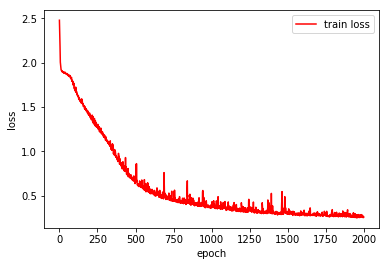

50/50 [==============================] - 0s 2ms/step
acc: 88.00


In [10]:
x_train_lstm = x_train.reshape((num_samples, WINDOW_SIZE, 1))  # (sample, timestep, feature)

# Build
model = Sequential()
model.add(LSTM(128, input_shape = (WINDOW_SIZE, 1)))  # (timestep, feature)
model.add(Dense(one_hot_size, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
history = model.fit(x_train_lstm, y_train,
                    epochs=2000,
                    batch_size=8,
                    verbose=1)

# plot training
plt.plot(history.history['loss'], 'r', label='train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate
scores = model.evaluate(x_train_lstm, y_train)
print('{0}: {1:.2f}'.format(model.metrics_names[1], scores[1]*100))

Predict

In [11]:
pred_count = num_sample  # max number of predictions

# 1. one step ahead
seq_out = ['g8', 'e8', 'e4', 'f8']  # final code (append predictions here)
pred_out = model.predict(x_train_lstm)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])  # transform: softmax of length `one_hot_size` -> index
    seq_out.append(idx2code[idx])  # transform: index -> code
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'f8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


<img src='img/stateless_one.png', style='width: 80%'/>

In [12]:
# 2. whole song
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / max_idx_value for it in seq_in]

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, WINDOW_SIZE, 1))  # (sample, timestep, feature)
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / max_idx_value)
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd4', 'c8', 'e8', 'd8', 'g8', 'e8', 'd4', 'e8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8']


<img src='img/stateless_full.png', style='width: 80%'/>

### Stateful LSTM

epochs :  0
Epoch 1/1
50/50 [==============================] - 1s 21ms/step - loss: 2.4007 - acc: 0.1600
epochs :  1
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 2.0172 - acc: 0.3400
epochs :  2
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.9632 - acc: 0.3400
epochs :  3
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.9474 - acc: 0.3400
epochs :  4
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 1.9383 - acc: 0.3400
epochs :  5
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.9317 - acc: 0.3400
epochs :  6
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 1.9266 - acc: 0.3400
epochs :  7
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9225 - acc: 0.3400
epochs :  8
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 1.9189 - acc: 0.3400
epochs :  9
Epoch 1/1
50/50 [==============================] - 

50/50 [==============================] - 0s 5ms/step - loss: 1.2955 - acc: 0.5400
epochs :  79
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3942 - acc: 0.5400
epochs :  80
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.2007 - acc: 0.5600
epochs :  81
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.2758 - acc: 0.5200
epochs :  82
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3558 - acc: 0.4400
epochs :  83
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3036 - acc: 0.4600
epochs :  84
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1406 - acc: 0.5600
epochs :  85
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3592 - acc: 0.5200
epochs :  86
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1777 - acc: 0.5600
epochs :  87
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - 

50/50 [==============================] - 0s 5ms/step - loss: 0.8265 - acc: 0.7000
epochs :  156
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.6478 - acc: 0.8200
epochs :  157
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.6142 - acc: 0.8000
epochs :  158
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.5642 - acc: 0.8200
epochs :  159
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.7538 - acc: 0.7800
epochs :  160
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.8715 - acc: 0.6200
epochs :  161
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.5669 - acc: 0.7600
epochs :  162
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.8202 - acc: 0.6200
epochs :  163
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.6618 - acc: 0.4800
epochs :  164
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 1.2301 - acc: 0.5800
epochs :  233
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.5207 - acc: 0.8200
epochs :  234
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1042 - acc: 0.5800
epochs :  235
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.5403 - acc: 0.7800
epochs :  236
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3695 - acc: 0.8800
epochs :  237
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.3559 - acc: 0.9200
epochs :  238
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4609 - acc: 0.8400
epochs :  239
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3271 - acc: 0.8600
epochs :  240
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4003 - acc: 0.8400
epochs :  241
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 0.6882 - acc: 0.7600
epochs :  310
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.8842 - acc: 0.7200
epochs :  311
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.7143 - acc: 0.7800
epochs :  312
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3546 - acc: 0.9200
epochs :  313
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.2735 - acc: 0.9000
epochs :  314
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.2775 - acc: 0.9200
epochs :  315
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1833 - acc: 0.9800
epochs :  316
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1994 - acc: 0.9600
epochs :  317
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1288 - acc: 1.0000
epochs :  318
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 0.0103 - acc: 1.0000
epochs :  387
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0097 - acc: 1.0000
epochs :  388
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0091 - acc: 1.0000
epochs :  389
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 1.0000
epochs :  390
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0080 - acc: 1.0000
epochs :  391
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0075 - acc: 1.0000
epochs :  392
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0072 - acc: 1.0000
epochs :  393
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0068 - acc: 1.0000
epochs :  394
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0065 - acc: 1.0000
epochs :  395
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 6.6309e-04 - acc: 1.0000
epochs :  463
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 6.4549e-04 - acc: 1.0000
epochs :  464
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.2708e-04 - acc: 1.0000
epochs :  465
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.1006e-04 - acc: 1.0000
epochs :  466
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.9274e-04 - acc: 1.0000
epochs :  467
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.7505e-04 - acc: 1.0000
epochs :  468
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 5.6097e-04 - acc: 1.0000
epochs :  469
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.4483e-04 - acc: 1.0000
epochs :  470
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.2881e-04 - acc: 1.0000
epochs :  471
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 6ms/step - loss: 8.4575e-05 - acc: 1.0000
epochs :  537
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 8.2337e-05 - acc: 1.0000
epochs :  538
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 8.0751e-05 - acc: 1.0000
epochs :  539
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 7.9688e-05 - acc: 1.0000
epochs :  540
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.8743e-05 - acc: 1.0000
epochs :  541
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.5796e-05 - acc: 1.0000
epochs :  542
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.5572e-05 - acc: 1.0000
epochs :  543
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.2267e-05 - acc: 1.0000
epochs :  544
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.9501e-05 - acc: 1.0000
epochs :  545
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 5ms/step - loss: 1.3419 - acc: 0.4400
epochs :  612
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 1.4417 - acc: 0.3600
epochs :  613
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 1.4009 - acc: 0.4400
epochs :  614
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.2200 - acc: 0.4800
epochs :  615
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.2146 - acc: 0.4400
epochs :  616
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.1735 - acc: 0.4400
epochs :  617
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.0384 - acc: 0.5800
epochs :  618
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1235 - acc: 0.6200
epochs :  619
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1133 - acc: 0.5600
epochs :  620
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 5ms/step - loss: 0.4069 - acc: 0.8200
epochs :  689
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3159 - acc: 0.8800
epochs :  690
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 0.5647 - acc: 0.7800
epochs :  691
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 0.3680 - acc: 0.9000
epochs :  692
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.5769 - acc: 0.8400
epochs :  693
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.8671 - acc: 0.6800
epochs :  694
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 0.6172 - acc: 0.7800
epochs :  695
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4034 - acc: 0.8800
epochs :  696
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 0.3518 - acc: 0.9400
epochs :  697
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 7ms/step - loss: 0.0070 - acc: 1.0000
epochs :  766
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0068 - acc: 1.0000
epochs :  767
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 0.0066 - acc: 1.0000
epochs :  768
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0064 - acc: 1.0000
epochs :  769
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 1.0000
epochs :  770
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 1.0000
epochs :  771
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0057 - acc: 1.0000
epochs :  772
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0054 - acc: 1.0000
epochs :  773
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0052 - acc: 1.0000
epochs :  774
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 1.2736 - acc: 0.4600
epochs :  843
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.7329 - acc: 0.6800
epochs :  844
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.4014 - acc: 0.9000
epochs :  845
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4202 - acc: 0.9200
epochs :  846
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3400 - acc: 0.9200
epochs :  847
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4932 - acc: 0.8200
epochs :  848
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4955 - acc: 0.8000
epochs :  849
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.5114 - acc: 0.8200
epochs :  850
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3635 - acc: 0.8800
epochs :  851
Epoch 1/1
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 7ms/step - loss: 0.9348 - acc: 0.7600
epochs :  920
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.4914 - acc: 0.5400
epochs :  921
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3927 - acc: 0.8800
epochs :  922
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4972 - acc: 0.8000
epochs :  923
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.4483 - acc: 0.8400
epochs :  924
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.3859 - acc: 0.8600
epochs :  925
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1927 - acc: 0.9800
epochs :  926
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1578 - acc: 0.9800
epochs :  927
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.2760 - acc: 0.9600
epochs :  928
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 7ms/step - loss: 0.0013 - acc: 1.0000
epochs :  997
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0013 - acc: 1.0000
epochs :  998
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0012 - acc: 1.0000
epochs :  999
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0012 - acc: 1.0000
epochs :  1000
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000
epochs :  1001
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000
epochs :  1002
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000
epochs :  1003
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0010 - acc: 1.0000
epochs :  1004
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0010 - acc: 1.0000
epochs :  1005
Epoch 1/1
50/50 [==============================] -

50/50 [==============================] - 0s 5ms/step - loss: 0.0261 - acc: 1.0000
epochs :  1072
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0193 - acc: 1.0000
epochs :  1073
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0158 - acc: 1.0000
epochs :  1074
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0139 - acc: 1.0000
epochs :  1075
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0122 - acc: 1.0000
epochs :  1076
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0110 - acc: 1.0000
epochs :  1077
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0100 - acc: 1.0000
epochs :  1078
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0091 - acc: 1.0000
epochs :  1079
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0083 - acc: 1.0000
epochs :  1080
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 5ms/step - loss: 7.3640e-04 - acc: 1.0000
epochs :  1148
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.2006e-04 - acc: 1.0000
epochs :  1149
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.0377e-04 - acc: 1.0000
epochs :  1150
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.8792e-04 - acc: 1.0000
epochs :  1151
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.7197e-04 - acc: 1.0000
epochs :  1152
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.4347e-04 - acc: 1.0000
epochs :  1153
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.1898e-04 - acc: 1.0000
epochs :  1154
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.9450e-04 - acc: 1.0000
epochs :  1155
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.7620e-04 - acc: 1.0000
epochs :  1156
Epoch 1/1
5

50/50 [==============================] - 0s 6ms/step - loss: 0.2354 - acc: 0.9400
epochs :  1222
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.3457 - acc: 0.8800
epochs :  1223
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 0.1860 - acc: 0.9400
epochs :  1224
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 0.1917 - acc: 0.9400
epochs :  1225
Epoch 1/1
50/50 [==============================] - 0s 10ms/step - loss: 0.1266 - acc: 0.9600
epochs :  1226
Epoch 1/1
50/50 [==============================] - 0s 9ms/step - loss: 0.0475 - acc: 1.0000
epochs :  1227
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0344 - acc: 1.0000
epochs :  1228
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0225 - acc: 1.0000
epochs :  1229
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0191 - acc: 1.0000
epochs :  1230
Epoch 1/1
50/50 [=============================

50/50 [==============================] - 0s 4ms/step - loss: 8.0077e-04 - acc: 1.0000
epochs :  1298
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 7.7276e-04 - acc: 1.0000
epochs :  1299
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.4598e-04 - acc: 1.0000
epochs :  1300
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.1999e-04 - acc: 1.0000
epochs :  1301
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.9607e-04 - acc: 1.0000
epochs :  1302
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.7336e-04 - acc: 1.0000
epochs :  1303
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.5066e-04 - acc: 1.0000
epochs :  1304
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.2893e-04 - acc: 1.0000
epochs :  1305
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 6.0831e-04 - acc: 1.0000
epochs :  1306
Epoch 1/1
5

50/50 [==============================] - 0s 5ms/step - loss: 1.0800e-04 - acc: 1.0000
epochs :  1372
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 1.0551e-04 - acc: 1.0000
epochs :  1373
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 1.0384e-04 - acc: 1.0000
epochs :  1374
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 1.0292e-04 - acc: 1.0000
epochs :  1375
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.0089e-04 - acc: 1.0000
epochs :  1376
Epoch 1/1
50/50 [==============================] - 0s 9ms/step - loss: 9.8402e-05 - acc: 1.0000
epochs :  1377
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.7564e-05 - acc: 1.0000
epochs :  1378
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.5049e-05 - acc: 1.0000
epochs :  1379
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.5422e-05 - acc: 1.0000
epochs :  1380
Epoch 1/1
5

50/50 [==============================] - 0s 4ms/step - loss: 1.6331 - acc: 0.4800
epochs :  1448
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 1.2786 - acc: 0.5400
epochs :  1449
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 0.6950 - acc: 0.7600
epochs :  1450
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 0.4275 - acc: 0.8600
epochs :  1451
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.2547 - acc: 0.9800
epochs :  1452
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1693 - acc: 0.9800
epochs :  1453
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1374 - acc: 0.9600
epochs :  1454
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1317 - acc: 0.9600
epochs :  1455
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1964 - acc: 0.9400
epochs :  1456
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 7ms/step - loss: 7.2552e-04 - acc: 1.0000
epochs :  1524
Epoch 1/1
50/50 [==============================] - 0s 9ms/step - loss: 7.0252e-04 - acc: 1.0000
epochs :  1525
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.8286e-04 - acc: 1.0000
epochs :  1526
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 6.5242e-04 - acc: 1.0000
epochs :  1527
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.3372e-04 - acc: 1.0000
epochs :  1528
Epoch 1/1
50/50 [==============================] - 1s 14ms/step - loss: 6.1318e-04 - acc: 1.0000
epochs :  1529
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 6.0205e-04 - acc: 1.0000
epochs :  1530
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 5.9956e-04 - acc: 1.0000
epochs :  1531
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 5.9075e-04 - acc: 1.0000
epochs :  1532
Epoch 1/1


50/50 [==============================] - 0s 6ms/step - loss: 8.6662e-05 - acc: 1.0000
epochs :  1598
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 8.4649e-05 - acc: 1.0000
epochs :  1599
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 8.2744e-05 - acc: 1.0000
epochs :  1600
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 8.1506e-05 - acc: 1.0000
epochs :  1601
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 7.9754e-05 - acc: 1.0000
epochs :  1602
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 7.7077e-05 - acc: 1.0000
epochs :  1603
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.4922e-05 - acc: 1.0000
epochs :  1604
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.2774e-05 - acc: 1.0000
epochs :  1605
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.1253e-05 - acc: 1.0000
epochs :  1606
Epoch 1/1
5

50/50 [==============================] - 0s 5ms/step - loss: 0.0187 - acc: 1.0000
epochs :  1674
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0158 - acc: 1.0000
epochs :  1675
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0138 - acc: 1.0000
epochs :  1676
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0123 - acc: 1.0000
epochs :  1677
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0112 - acc: 1.0000
epochs :  1678
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0102 - acc: 1.0000
epochs :  1679
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0093 - acc: 1.0000
epochs :  1680
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 1.0000
epochs :  1681
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0079 - acc: 1.0000
epochs :  1682
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 5ms/step - loss: 5.4733e-04 - acc: 1.0000
epochs :  1749
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.2871e-04 - acc: 1.0000
epochs :  1750
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.1965e-04 - acc: 1.0000
epochs :  1751
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.0566e-04 - acc: 1.0000
epochs :  1752
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.0114e-04 - acc: 1.0000
epochs :  1753
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.7942e-04 - acc: 1.0000
epochs :  1754
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.7980e-04 - acc: 1.0000
epochs :  1755
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 4.9644e-04 - acc: 1.0000
epochs :  1756
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000
epochs :  1757
Epoch 1/1
50/50

50/50 [==============================] - 0s 6ms/step - loss: 0.0952 - acc: 0.9600
epochs :  1825
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0648 - acc: 0.9800
epochs :  1826
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.1038 - acc: 0.9400
epochs :  1827
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 0.0374 - acc: 1.0000
epochs :  1828
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0164 - acc: 1.0000
epochs :  1829
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0149 - acc: 1.0000
epochs :  1830
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0118 - acc: 1.0000
epochs :  1831
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0101 - acc: 1.0000
epochs :  1832
Epoch 1/1
50/50 [==============================] - 0s 9ms/step - loss: 0.0088 - acc: 1.0000
epochs :  1833
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 6ms/step - loss: 0.0285 - acc: 1.0000
epochs :  1901
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0126 - acc: 1.0000
epochs :  1902
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0077 - acc: 1.0000
epochs :  1903
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0066 - acc: 1.0000
epochs :  1904
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0066 - acc: 1.0000
epochs :  1905
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0079 - acc: 1.0000
epochs :  1906
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0049 - acc: 1.0000
epochs :  1907
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0049 - acc: 1.0000
epochs :  1908
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0049 - acc: 1.0000
epochs :  1909
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 5.2229e-04 - acc: 1.0000
epochs :  1976
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.1181e-04 - acc: 1.0000
epochs :  1977
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 5.0194e-04 - acc: 1.0000
epochs :  1978
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.9233e-04 - acc: 1.0000
epochs :  1979
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.8257e-04 - acc: 1.0000
epochs :  1980
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.7404e-04 - acc: 1.0000
epochs :  1981
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 4.6494e-04 - acc: 1.0000
epochs :  1982
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.5676e-04 - acc: 1.0000
epochs :  1983
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.4949e-04 - acc: 1.0000
epochs :  1984
Epoch 1/1
5

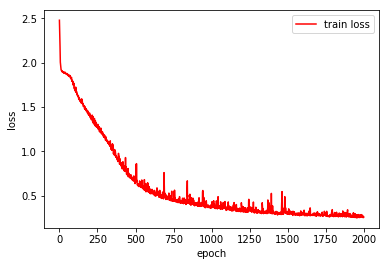

50/50 [==============================] - 0s 6ms/step
acc: 100.00


In [31]:
x_train_lstm = np.reshape(x_train, (num_samples, WINDOW_SIZE, 1))

# Build
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, WINDOW_SIZE, 1), stateful=True))  # batch_size required!
model.add(Dense(one_hot_size, activation='softmax'))
    
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
num_epochs = 2000
for epoch_idx in range(num_epochs):
    print ('epochs : ', epoch_idx)
    model.fit(x_train_lstm, y_train,
              epochs=1,
              batch_size=1,
              verbose=1,
              shuffle=False)
    model.reset_states()
    
# Plot training
plt.plot(history.history['loss'], 'r', label='train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate
scores = model.evaluate(x_train_lstm, y_train, batch_size=1)
print('{0}: {1:.2f}'.format(model.metrics_names[1], scores[1]*100))
model.reset_states()

Predict

In [32]:
pred_count = num_samples  # max number of predictions

# 1. one step ahead
seq_out = ['g8', 'e8', 'e4', 'f8']  # final code (append predictions here)
pred_out = model.predict(x_train_lstm, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i])  # transform: softmax of length `one_hot_size` -> index
    seq_out.append(idx2code[idx])  # transform: index -> code
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


<img src='img/stateful_one.png', style='width: 80%'/>

In [33]:
# 2. whole song
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / max_idx_value for it in seq_in]

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, WINDOW_SIZE, 1))  # (sample, timestep, feature)
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / max_idx_value)
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8']


<img src='img/stateful_full.png', style='width: 80%'/>

### Multiple input features
Use 2 attributes (scale, length) as independent features, e.g. c4 -> (c,4)

In [16]:
code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

max_scale_value = 6
num_features = 2

# e.g. c4 -> (0,0)
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))  # normalized
    features.append(code2length[code[1]])
    return features

def seq2dataset(seq, window_size):
    dataset_X = []  # holds features: (code, length)
    dataset_Y = []  # holds indices
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        for s in subset[:-1]:
            features = code2features(s)            
            dataset_X.append(features)
        dataset_Y.append([code2idx[subset[-1]]])
    return np.array(dataset_X), np.array(dataset_Y)

epochs :  0
Epoch 1/1
50/50 [==============================] - 1s 22ms/step - loss: 2.3364 - acc: 0.2600
epochs :  1
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.0104 - acc: 0.3400
epochs :  2
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9618 - acc: 0.3400
epochs :  3
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9451 - acc: 0.3400
epochs :  4
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9350 - acc: 0.3400
epochs :  5
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9275 - acc: 0.3400
epochs :  6
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9216 - acc: 0.3400
epochs :  7
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9165 - acc: 0.3400
epochs :  8
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.9119 - acc: 0.3400
epochs :  9
Epoch 1/1
50/50 [==============================] - 

50/50 [==============================] - 0s 6ms/step - loss: 0.3946 - acc: 0.8800
epochs :  79
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2824 - acc: 0.9400
epochs :  80
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.4452 - acc: 0.8800
epochs :  81
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.5887 - acc: 0.8000
epochs :  82
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.5177 - acc: 0.8200
epochs :  83
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.3443 - acc: 0.9200
epochs :  84
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2109 - acc: 0.9400
epochs :  85
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1825 - acc: 0.9800
epochs :  86
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1486 - acc: 1.0000
epochs :  87
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - 

50/50 [==============================] - 0s 6ms/step - loss: 0.0076 - acc: 1.0000
epochs :  156
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0072 - acc: 1.0000
epochs :  157
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0068 - acc: 1.0000
epochs :  158
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0065 - acc: 1.0000
epochs :  159
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0062 - acc: 1.0000
epochs :  160
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0059 - acc: 1.0000
epochs :  161
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0056 - acc: 1.0000
epochs :  162
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0054 - acc: 1.0000
epochs :  163
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0052 - acc: 1.0000
epochs :  164
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 0.3988 - acc: 0.8800
epochs :  233
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2870 - acc: 0.8800
epochs :  234
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1283 - acc: 1.0000
epochs :  235
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1050 - acc: 1.0000
epochs :  236
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0849 - acc: 1.0000
epochs :  237
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0670 - acc: 1.0000
epochs :  238
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0580 - acc: 1.0000
epochs :  239
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0441 - acc: 1.0000
epochs :  240
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0421 - acc: 1.0000
epochs :  241
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 1.2605 - acc: 0.6600
epochs :  310
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.1208 - acc: 0.6200
epochs :  311
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.7107 - acc: 0.8000
epochs :  312
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.8634 - acc: 0.7400
epochs :  313
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2843 - acc: 0.9200
epochs :  314
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2685 - acc: 0.9400
epochs :  315
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.6556 - acc: 0.7800
epochs :  316
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.4770 - acc: 0.8600
epochs :  317
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.3613 - acc: 0.8600
epochs :  318
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 0.0072 - acc: 1.0000
epochs :  387
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0068 - acc: 1.0000
epochs :  388
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0063 - acc: 1.0000
epochs :  389
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0059 - acc: 1.0000
epochs :  390
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0055 - acc: 1.0000
epochs :  391
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0052 - acc: 1.0000
epochs :  392
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0049 - acc: 1.0000
epochs :  393
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0046 - acc: 1.0000
epochs :  394
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0043 - acc: 1.0000
epochs :  395
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 3.9950e-04 - acc: 1.0000
epochs :  463
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.8837e-04 - acc: 1.0000
epochs :  464
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.7939e-04 - acc: 1.0000
epochs :  465
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.6883e-04 - acc: 1.0000
epochs :  466
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.5740e-04 - acc: 1.0000
epochs :  467
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.4664e-04 - acc: 1.0000
epochs :  468
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.3645e-04 - acc: 1.0000
epochs :  469
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.2650e-04 - acc: 1.0000
epochs :  470
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 3.1795e-04 - acc: 1.0000
epochs :  471
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 6ms/step - loss: 5.9431e-05 - acc: 1.0000
epochs :  537
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.0595e-05 - acc: 1.0000
epochs :  538
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.8750e-05 - acc: 1.0000
epochs :  539
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.7445e-05 - acc: 1.0000
epochs :  540
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.5250e-05 - acc: 1.0000
epochs :  541
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.2811e-05 - acc: 1.0000
epochs :  542
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.0608e-05 - acc: 1.0000
epochs :  543
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.8278e-05 - acc: 1.0000
epochs :  544
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.5816e-05 - acc: 1.0000
epochs :  545
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 6ms/step - loss: 6.4290e-06 - acc: 1.0000
epochs :  611
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.2788e-06 - acc: 1.0000
epochs :  612
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.2335e-06 - acc: 1.0000
epochs :  613
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.3777e-06 - acc: 1.0000
epochs :  614
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.0346e-06 - acc: 1.0000
epochs :  615
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.5997e-06 - acc: 1.0000
epochs :  616
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.0618e-06 - acc: 1.0000
epochs :  617
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.7020e-06 - acc: 1.0000
epochs :  618
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.7054e-06 - acc: 1.0000
epochs :  619
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 6ms/step - loss: 0.0026 - acc: 1.0000
epochs :  687
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0031 - acc: 1.0000
epochs :  688
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0032 - acc: 1.0000
epochs :  689
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0020 - acc: 1.0000
epochs :  690
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0019 - acc: 1.0000
epochs :  691
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0019 - acc: 1.0000
epochs :  692
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0019 - acc: 1.0000
epochs :  693
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0019 - acc: 1.0000
epochs :  694
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0019 - acc: 1.0000
epochs :  695
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 0.0155 - acc: 1.0000
epochs :  763
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0137 - acc: 1.0000
epochs :  764
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0123 - acc: 1.0000
epochs :  765
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0111 - acc: 1.0000
epochs :  766
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0101 - acc: 1.0000
epochs :  767
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0093 - acc: 1.0000
epochs :  768
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0087 - acc: 1.0000
epochs :  769
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0081 - acc: 1.0000
epochs :  770
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0075 - acc: 1.0000
epochs :  771
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 0.0090 - acc: 1.0000
epochs :  840
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0079 - acc: 1.0000
epochs :  841
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0071 - acc: 1.0000
epochs :  842
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0065 - acc: 1.0000
epochs :  843
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0060 - acc: 1.0000
epochs :  844
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0057 - acc: 1.0000
epochs :  845
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0054 - acc: 1.0000
epochs :  846
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0052 - acc: 1.0000
epochs :  847
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0050 - acc: 1.0000
epochs :  848
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 0.3121 - acc: 0.9400
epochs :  916
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.7975 - acc: 0.6000
epochs :  917
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.2320 - acc: 0.5800
epochs :  918
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.5214 - acc: 0.8000
epochs :  919
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.4194 - acc: 0.8200
epochs :  920
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.2254 - acc: 0.9200
epochs :  921
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1700 - acc: 0.9800
epochs :  922
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1128 - acc: 0.9800
epochs :  923
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.1457 - acc: 0.9400
epochs :  924
Epoch 1/1
50/50 [==============================] - 0s 6m

50/50 [==============================] - 0s 6ms/step - loss: 6.0734e-04 - acc: 1.0000
epochs :  992
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.8980e-04 - acc: 1.0000
epochs :  993
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.7270e-04 - acc: 1.0000
epochs :  994
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.5596e-04 - acc: 1.0000
epochs :  995
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.3968e-04 - acc: 1.0000
epochs :  996
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.2385e-04 - acc: 1.0000
epochs :  997
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.0828e-04 - acc: 1.0000
epochs :  998
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.9301e-04 - acc: 1.0000
epochs :  999
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.7817e-04 - acc: 1.0000
epochs :  1000
Epoch 1/1
50/50 [==

50/50 [==============================] - 0s 6ms/step - loss: 7.3600e-05 - acc: 1.0000
epochs :  1066
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.1711e-05 - acc: 1.0000
epochs :  1067
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.9737e-05 - acc: 1.0000
epochs :  1068
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.7913e-05 - acc: 1.0000
epochs :  1069
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.5987e-05 - acc: 1.0000
epochs :  1070
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.4342e-05 - acc: 1.0000
epochs :  1071
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.2378e-05 - acc: 1.0000
epochs :  1072
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.0801e-05 - acc: 1.0000
epochs :  1073
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.9218e-05 - acc: 1.0000
epochs :  1074
Epoch 1/1
5

50/50 [==============================] - 0s 6ms/step - loss: 0.0090 - acc: 1.0000
epochs :  1141
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0079 - acc: 1.0000
epochs :  1142
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0078 - acc: 1.0000
epochs :  1143
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0074 - acc: 1.0000
epochs :  1144
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0066 - acc: 1.0000
epochs :  1145
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0058 - acc: 1.0000
epochs :  1146
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0053 - acc: 1.0000
epochs :  1147
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0050 - acc: 1.0000
epochs :  1148
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 0.0050 - acc: 1.0000
epochs :  1149
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 6ms/step - loss: 5.5332e-04 - acc: 1.0000
epochs :  1217
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.4012e-04 - acc: 1.0000
epochs :  1218
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.2863e-04 - acc: 1.0000
epochs :  1219
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.1802e-04 - acc: 1.0000
epochs :  1220
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 5.0845e-04 - acc: 1.0000
epochs :  1221
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.9994e-04 - acc: 1.0000
epochs :  1222
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.9077e-04 - acc: 1.0000
epochs :  1223
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.7911e-04 - acc: 1.0000
epochs :  1224
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.6722e-04 - acc: 1.0000
epochs :  1225
Epoch 1/1
5

50/50 [==============================] - 0s 6ms/step - loss: 9.5894e-05 - acc: 1.0000
epochs :  1291
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.2976e-05 - acc: 1.0000
epochs :  1292
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.5509e-05 - acc: 1.0000
epochs :  1293
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.7185e-05 - acc: 1.0000
epochs :  1294
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.8100e-05 - acc: 1.0000
epochs :  1295
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.6483e-05 - acc: 1.0000
epochs :  1296
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.2388e-05 - acc: 1.0000
epochs :  1297
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 8.7367e-05 - acc: 1.0000
epochs :  1298
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 8.4652e-05 - acc: 1.0000
epochs :  1299
Epoch 1/1
5

epochs :  1364
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1480e-05 - acc: 1.0000
epochs :  1365
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.1190e-05 - acc: 1.0000
epochs :  1366
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 1.0854e-05 - acc: 1.0000
epochs :  1367
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 1.0500e-05 - acc: 1.0000
epochs :  1368
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.0188e-05 - acc: 1.0000
epochs :  1369
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 9.9338e-06 - acc: 1.0000
epochs :  1370
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 9.6429e-06 - acc: 1.0000
epochs :  1371
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 9.3365e-06 - acc: 1.0000
epochs :  1372
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 9.0385e-06 - acc: 1.0000
e

50/50 [==============================] - 0s 5ms/step - loss: 0.0019 - acc: 1.0000
epochs :  1440
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0018 - acc: 1.0000
epochs :  1441
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0018 - acc: 1.0000
epochs :  1442
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0016 - acc: 1.0000
epochs :  1443
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0015 - acc: 1.0000
epochs :  1444
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0014 - acc: 1.0000
epochs :  1445
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0014 - acc: 1.0000
epochs :  1446
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0015 - acc: 1.0000
epochs :  1447
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 0.0017 - acc: 1.0000
epochs :  1448
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 5ms/step - loss: 1.6979e-04 - acc: 1.0000
epochs :  1514
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.6494e-04 - acc: 1.0000
epochs :  1515
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.6006e-04 - acc: 1.0000
epochs :  1516
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.5541e-04 - acc: 1.0000
epochs :  1517
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.5090e-04 - acc: 1.0000
epochs :  1518
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.4658e-04 - acc: 1.0000
epochs :  1519
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.4244e-04 - acc: 1.0000
epochs :  1520
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3853e-04 - acc: 1.0000
epochs :  1521
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.3477e-04 - acc: 1.0000
epochs :  1522
Epoch 1/1
5

epochs :  1587
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 2.6107e-05 - acc: 1.0000
epochs :  1588
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.5536e-05 - acc: 1.0000
epochs :  1589
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.4963e-05 - acc: 1.0000
epochs :  1590
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.4388e-05 - acc: 1.0000
epochs :  1591
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.3848e-05 - acc: 1.0000
epochs :  1592
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.3325e-05 - acc: 1.0000
epochs :  1593
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 2.2804e-05 - acc: 1.0000
epochs :  1594
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 2.2302e-05 - acc: 1.0000
epochs :  1595
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 2.1798e-05 - acc: 1.0000
e

50/50 [==============================] - 0s 5ms/step - loss: 5.0700e-06 - acc: 1.0000
epochs :  1661
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.9365e-06 - acc: 1.0000
epochs :  1662
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.8292e-06 - acc: 1.0000
epochs :  1663
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 4.7291e-06 - acc: 1.0000
epochs :  1664
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.6623e-06 - acc: 1.0000
epochs :  1665
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.5419e-06 - acc: 1.0000
epochs :  1666
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.4346e-06 - acc: 1.0000
epochs :  1667
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.2737e-06 - acc: 1.0000
epochs :  1668
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 4.1497e-06 - acc: 1.0000
epochs :  1669
Epoch 1/1
5

50/50 [==============================] - 0s 4ms/step - loss: 8.1539e-07 - acc: 1.0000
epochs :  1735
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 7.8797e-07 - acc: 1.0000
epochs :  1736
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 7.7248e-07 - acc: 1.0000
epochs :  1737
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 7.4983e-07 - acc: 1.0000
epochs :  1738
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 7.2956e-07 - acc: 1.0000
epochs :  1739
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 7.0930e-07 - acc: 1.0000
epochs :  1740
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 6.9380e-07 - acc: 1.0000
epochs :  1741
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 6.7592e-07 - acc: 1.0000
epochs :  1742
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 6.5923e-07 - acc: 1.0000
epochs :  1743
Epoch 1/1
5

50/50 [==============================] - 0s 5ms/step - loss: 1.6212e-07 - acc: 1.0000
epochs :  1809
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.7047e-07 - acc: 1.0000
epochs :  1810
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.6689e-07 - acc: 1.0000
epochs :  1811
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 1.6809e-07 - acc: 1.0000
epochs :  1812
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.6093e-07 - acc: 1.0000
epochs :  1813
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.5616e-07 - acc: 1.0000
epochs :  1814
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.5378e-07 - acc: 1.0000
epochs :  1815
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.4782e-07 - acc: 1.0000
epochs :  1816
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.5378e-07 - acc: 1.0000
epochs :  1817
Epoch 1/1
5

50/50 [==============================] - 0s 6ms/step - loss: 8.3570e-04 - acc: 1.0000
epochs :  1884
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 8.1181e-04 - acc: 1.0000
epochs :  1885
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.7211e-04 - acc: 1.0000
epochs :  1886
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 7.2570e-04 - acc: 1.0000
epochs :  1887
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.9679e-04 - acc: 1.0000
epochs :  1888
Epoch 1/1
50/50 [==============================] - 0s 6ms/step - loss: 6.6585e-04 - acc: 1.0000
epochs :  1889
Epoch 1/1
50/50 [==============================] - 0s 7ms/step - loss: 6.4168e-04 - acc: 1.0000
epochs :  1890
Epoch 1/1
50/50 [==============================] - 0s 9ms/step - loss: 6.1055e-04 - acc: 1.0000
epochs :  1891
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 5.9897e-04 - acc: 1.0000
epochs :  1892
Epoch 1/1
5

50/50 [==============================] - 0s 5ms/step - loss: 1.2890e-04 - acc: 1.0000
epochs :  1957
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.2291e-04 - acc: 1.0000
epochs :  1958
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.1448e-04 - acc: 1.0000
epochs :  1959
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.0972e-04 - acc: 1.0000
epochs :  1960
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.3783e-05 - acc: 1.0000
epochs :  1961
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.5530e-05 - acc: 1.0000
epochs :  1962
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.9307e-05 - acc: 1.0000
epochs :  1963
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 1.0119e-04 - acc: 1.0000
epochs :  1964
Epoch 1/1
50/50 [==============================] - 0s 5ms/step - loss: 9.2973e-05 - acc: 1.0000
epochs :  1965
Epoch 1/1
5

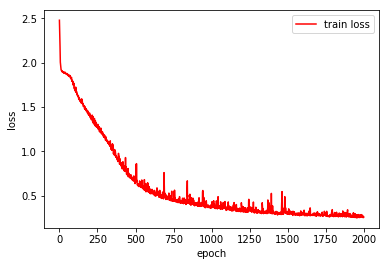

50/50 [==============================] - 0s 4ms/step
acc: 100.00


In [17]:
x_train, y_train = seq2dataset(seq, WINDOW_SIZE)
x_train = x_train.reshape((num_samples, WINDOW_SIZE, num_features))  # (sample, timestep, feature)
y_train = to_categorical(y_train)

# Build
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, WINDOW_SIZE, num_features), stateful=True))
model.add(Dense(one_hot_size, activation='softmax'))
    
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
num_epochs = 2000
for epoch_idx in range(num_epochs):
    print ('epochs : ', epoch_idx)
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=1,
              verbose=1,
              shuffle=False)
    model.reset_states()
    
# Plot training
plt.plot(history.history['loss'], 'r', label='train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate
scores = model.evaluate(x_train, y_train, batch_size=1)
print('{0}: {1:.2f}'.format(model.metrics_names[1], scores[1]*100))
model.reset_states()

Predict

In [23]:
pred_count = num_samples

# 1. one step ahead
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) 
    seq_out.append(idx2code[idx])
    
print("one step prediction : ", seq_out)

model.reset_states()

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


<img src='img/mult_one.png', style='width: 80%'/>

In [22]:
# 2. whole song
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_features = []

for si in seq_in:
    features = code2features(si)
    seq_in_features.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_features)
    sample_in = np.reshape(sample_in, (1, WINDOW_SIZE, num_features)) 
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_features.append(features)
    seq_in_features.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


<img src='img/mult_full.png', style='width: 80%'/>